In [1]:
import code.model as model

from PIL import Image
import matplotlib.pyplot as plt

import itertools
import numpy as np
import time
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision.transforms as tmf
import pandas as pd

# Dataloader prepare
from code.data_reader import get_loaders_and_datasets
from code.config import DATASET_NAME, epoch_round, validation_round, need_dump
# Get value which is static in one running 
from code.static import lp_method, device, get_net, set_net
if lp_method:
    print('use LP method')
else:
    print('use softmax')

print('device:', device)
print('dataset name:', DATASET_NAME)
print(f'Validate per {validation_round} round')
print(f'Limitation: {epoch_round} round.')

# Get data loaders
_loaders, _datasets = get_loaders_and_datasets()
train_loader, validate_loader, test_loader = _loaders
dataset_train, dataset_validate, dataset_test = _datasets
net, _ = get_net()

use LP method
device: cuda:0
dataset name: DRIVE
Validate per 5 round
Limitation: 1000 round.


In [2]:
from code.trainer import train

# Do the training
max_run_round = epoch_round
temp_statsrec, cmtensor = train(max_run_round, train_loader, validate_loader)

epoch 0 time Tue Oct 26 19:13:41 2021
epoch 1 time Tue Oct 26 19:13:58 2021
epoch 2 time Tue Oct 26 19:14:16 2021
epoch 3 time Tue Oct 26 19:14:33 2021
epoch 4 time Tue Oct 26 19:14:50 2021
Epoch:4 TrainLoss: 0.02753 ValidationLoss:  0.04479, Accuracy: 0.92123, Precision: 0.67848, Recall: 0.41411 F1: 0.51431, +: 200911, -: 4237038, False+: 284252, False-: 95207
epoch 5 time Tue Oct 26 19:15:11 2021
epoch 6 time Tue Oct 26 19:15:28 2021
epoch 7 time Tue Oct 26 19:15:45 2021
epoch 8 time Tue Oct 26 19:16:02 2021
epoch 9 time Tue Oct 26 19:16:19 2021
Epoch:9 TrainLoss: 0.02194 ValidationLoss:  0.01994, Accuracy: 0.94999, Precision: 0.88566, Recall: 0.57806 F1: 0.69953, +: 280451, -: 4296037, False+: 204712, False-: 36208
epoch 10 time Tue Oct 26 19:16:40 2021
epoch 11 time Tue Oct 26 19:16:57 2021
epoch 12 time Tue Oct 26 19:17:15 2021
epoch 13 time Tue Oct 26 19:17:32 2021
epoch 14 time Tue Oct 26 19:17:49 2021
Epoch:14 TrainLoss: 0.02013 ValidationLoss:  0.01977, Accuracy: 0.94778, Prec

epoch 112 time Tue Oct 26 19:47:06 2021
epoch 113 time Tue Oct 26 19:47:23 2021
epoch 114 time Tue Oct 26 19:47:40 2021
Epoch:114 TrainLoss: 0.01357 ValidationLoss:  0.01565, Accuracy: 0.95571, Precision: 0.90492, Recall: 0.62600 F1: 0.74005, +: 303713, -: 4300333, False+: 181450, False-: 31912
epoch 115 time Tue Oct 26 19:48:01 2021
epoch 116 time Tue Oct 26 19:48:18 2021
epoch 117 time Tue Oct 26 19:48:35 2021
epoch 118 time Tue Oct 26 19:48:52 2021
epoch 119 time Tue Oct 26 19:49:09 2021
Epoch:119 TrainLoss: 0.01312 ValidationLoss:  0.01158, Accuracy: 0.96293, Precision: 0.88944, Recall: 0.72167 F1: 0.79682, +: 350129, -: 4288721, False+: 135034, False-: 43524
epoch 120 time Tue Oct 26 19:49:30 2021
epoch 121 time Tue Oct 26 19:49:48 2021
epoch 122 time Tue Oct 26 19:50:05 2021
epoch 123 time Tue Oct 26 19:50:22 2021
epoch 124 time Tue Oct 26 19:50:39 2021
Epoch:124 TrainLoss: 0.01310 ValidationLoss:  0.01156, Accuracy: 0.96323, Precision: 0.88687, Recall: 0.72774 F1: 0.79947, +: 35

epoch 221 time Tue Oct 26 20:19:35 2021
epoch 222 time Tue Oct 26 20:19:52 2021
epoch 223 time Tue Oct 26 20:20:09 2021
epoch 224 time Tue Oct 26 20:20:26 2021
Epoch:224 TrainLoss: 0.01224 ValidationLoss:  0.01087, Accuracy: 0.96439, Precision: 0.87512, Recall: 0.75403 F1: 0.81008, +: 365828, -: 4280043, False+: 119335, False-: 52202
epoch 225 time Tue Oct 26 20:20:47 2021
epoch 226 time Tue Oct 26 20:21:04 2021
epoch 227 time Tue Oct 26 20:21:22 2021
epoch 228 time Tue Oct 26 20:21:38 2021
epoch 229 time Tue Oct 26 20:21:56 2021
Epoch:229 TrainLoss: 0.01160 ValidationLoss:  0.01051, Accuracy: 0.96472, Precision: 0.86449, Recall: 0.77044 F1: 0.81476, +: 373789, -: 4273653, False+: 111374, False-: 58592
epoch 230 time Tue Oct 26 20:22:16 2021
epoch 231 time Tue Oct 26 20:22:34 2021
epoch 232 time Tue Oct 26 20:22:51 2021
epoch 233 time Tue Oct 26 20:23:08 2021
epoch 234 time Tue Oct 26 20:23:25 2021
Epoch:234 TrainLoss: 0.01234 ValidationLoss:  0.01159, Accuracy: 0.96265, Precision: 0.8

epoch 331 time Tue Oct 26 20:52:23 2021
epoch 332 time Tue Oct 26 20:52:41 2021
epoch 333 time Tue Oct 26 20:52:58 2021
epoch 334 time Tue Oct 26 20:53:15 2021
Epoch:334 TrainLoss: 0.01098 ValidationLoss:  0.01081, Accuracy: 0.96436, Precision: 0.85839, Recall: 0.77374 F1: 0.81387, +: 375389, -: 4270316, False+: 109774, False-: 61929
epoch 335 time Tue Oct 26 20:53:36 2021
epoch 336 time Tue Oct 26 20:53:53 2021
epoch 337 time Tue Oct 26 20:54:10 2021
epoch 338 time Tue Oct 26 20:54:27 2021
epoch 339 time Tue Oct 26 20:54:44 2021
Epoch:339 TrainLoss: 0.01140 ValidationLoss:  0.01092, Accuracy: 0.96425, Precision: 0.87026, Recall: 0.75798 F1: 0.81025, +: 367746, -: 4277421, False+: 117417, False-: 54824
epoch 340 time Tue Oct 26 20:55:05 2021
epoch 341 time Tue Oct 26 20:55:22 2021
epoch 342 time Tue Oct 26 20:55:40 2021
epoch 343 time Tue Oct 26 20:55:57 2021
epoch 344 time Tue Oct 26 20:56:14 2021
Epoch:344 TrainLoss: 0.01117 ValidationLoss:  0.01041, Accuracy: 0.96498, Precision: 0.8

epoch 441 time Tue Oct 26 21:25:11 2021
epoch 442 time Tue Oct 26 21:25:28 2021
epoch 443 time Tue Oct 26 21:25:45 2021
epoch 444 time Tue Oct 26 21:26:03 2021
Epoch:444 TrainLoss: 0.01031 ValidationLoss:  0.01064, Accuracy: 0.96479, Precision: 0.84880, Recall: 0.79140 F1: 0.81910, +: 383959, -: 4263847, False+: 101204, False-: 68398
epoch 445 time Tue Oct 26 21:26:23 2021
epoch 446 time Tue Oct 26 21:26:40 2021
epoch 447 time Tue Oct 26 21:26:58 2021
epoch 448 time Tue Oct 26 21:27:15 2021
epoch 449 time Tue Oct 26 21:27:32 2021
Epoch:449 TrainLoss: 0.00999 ValidationLoss:  0.01042, Accuracy: 0.96524, Precision: 0.86734, Recall: 0.77309 F1: 0.81751, +: 375077, -: 4274879, False+: 110086, False-: 57366
epoch 450 time Tue Oct 26 21:27:53 2021
epoch 451 time Tue Oct 26 21:28:10 2021
epoch 452 time Tue Oct 26 21:28:27 2021
epoch 453 time Tue Oct 26 21:28:44 2021
epoch 454 time Tue Oct 26 21:29:01 2021
Epoch:454 TrainLoss: 0.00983 ValidationLoss:  0.01067, Accuracy: 0.96470, Precision: 0.8

epoch 551 time Tue Oct 26 21:57:57 2021
epoch 552 time Tue Oct 26 21:58:15 2021
epoch 553 time Tue Oct 26 21:58:32 2021
epoch 554 time Tue Oct 26 21:58:49 2021
Epoch:554 TrainLoss: 0.00923 ValidationLoss:  0.01118, Accuracy: 0.96393, Precision: 0.82878, Recall: 0.80897 F1: 0.81875, +: 392480, -: 4251160, False+: 92683, False-: 81085
epoch 555 time Tue Oct 26 21:59:10 2021
epoch 556 time Tue Oct 26 21:59:27 2021
epoch 557 time Tue Oct 26 21:59:44 2021
epoch 558 time Tue Oct 26 22:00:01 2021
epoch 559 time Tue Oct 26 22:00:18 2021
Epoch:559 TrainLoss: 0.00912 ValidationLoss:  0.01108, Accuracy: 0.96393, Precision: 0.84197, Recall: 0.79017 F1: 0.81525, +: 383363, -: 4260289, False+: 101800, False-: 71956
epoch 560 time Tue Oct 26 22:00:39 2021
epoch 561 time Tue Oct 26 22:00:56 2021
epoch 562 time Tue Oct 26 22:01:13 2021
epoch 563 time Tue Oct 26 22:01:30 2021
epoch 564 time Tue Oct 26 22:01:47 2021
Epoch:564 TrainLoss: 0.00906 ValidationLoss:  0.01169, Accuracy: 0.96328, Precision: 0.86

epoch 661 time Tue Oct 26 22:30:45 2021
epoch 662 time Tue Oct 26 22:31:02 2021
epoch 663 time Tue Oct 26 22:31:19 2021
epoch 664 time Tue Oct 26 22:31:37 2021
Epoch:664 TrainLoss: 0.00752 ValidationLoss:  0.01139, Accuracy: 0.96326, Precision: 0.84555, Recall: 0.77709 F1: 0.80988, +: 377016, -: 4263379, False+: 108147, False-: 68866
epoch 665 time Tue Oct 26 22:31:58 2021
epoch 666 time Tue Oct 26 22:32:15 2021
epoch 667 time Tue Oct 26 22:32:32 2021
epoch 668 time Tue Oct 26 22:32:50 2021
epoch 669 time Tue Oct 26 22:33:07 2021
Epoch:669 TrainLoss: 0.00738 ValidationLoss:  0.01132, Accuracy: 0.96297, Precision: 0.82346, Recall: 0.80484 F1: 0.81405, +: 390481, -: 4248533, False+: 94682, False-: 83712
epoch 670 time Tue Oct 26 22:33:28 2021
epoch 671 time Tue Oct 26 22:33:45 2021
epoch 672 time Tue Oct 26 22:34:02 2021
epoch 673 time Tue Oct 26 22:34:20 2021
epoch 674 time Tue Oct 26 22:34:37 2021
Epoch:674 TrainLoss: 0.00745 ValidationLoss:  0.01134, Accuracy: 0.96322, Precision: 0.84

epoch 771 time Tue Oct 26 23:03:37 2021
epoch 772 time Tue Oct 26 23:03:54 2021
epoch 773 time Tue Oct 26 23:04:12 2021
epoch 774 time Tue Oct 26 23:04:29 2021
Epoch:774 TrainLoss: 0.00612 ValidationLoss:  0.01193, Accuracy: 0.96147, Precision: 0.82129, Recall: 0.78914 F1: 0.80489, +: 382861, -: 4248936, False+: 102302, False-: 83309
epoch 775 time Tue Oct 26 23:04:50 2021
epoch 776 time Tue Oct 26 23:05:07 2021
epoch 777 time Tue Oct 26 23:05:24 2021
epoch 778 time Tue Oct 26 23:05:41 2021
epoch 779 time Tue Oct 26 23:05:59 2021
Epoch:779 TrainLoss: 0.00631 ValidationLoss:  0.01179, Accuracy: 0.96191, Precision: 0.81956, Recall: 0.79727 F1: 0.80826, +: 386806, -: 4247084, False+: 98357, False-: 85161
epoch 780 time Tue Oct 26 23:06:20 2021
epoch 781 time Tue Oct 26 23:06:37 2021
epoch 782 time Tue Oct 26 23:06:54 2021
epoch 783 time Tue Oct 26 23:07:11 2021
epoch 784 time Tue Oct 26 23:07:28 2021
Epoch:784 TrainLoss: 0.00620 ValidationLoss:  0.01178, Accuracy: 0.96233, Precision: 0.83

epoch 881 time Tue Oct 26 23:36:26 2021
epoch 882 time Tue Oct 26 23:36:43 2021
epoch 883 time Tue Oct 26 23:37:00 2021
epoch 884 time Tue Oct 26 23:37:18 2021
Epoch:884 TrainLoss: 0.00512 ValidationLoss:  0.01233, Accuracy: 0.96089, Precision: 0.82652, Recall: 0.77413 F1: 0.79947, +: 375580, -: 4253411, False+: 109583, False-: 78834
epoch 885 time Tue Oct 26 23:37:38 2021
epoch 886 time Tue Oct 26 23:37:56 2021
epoch 887 time Tue Oct 26 23:38:13 2021
epoch 888 time Tue Oct 26 23:38:30 2021
epoch 889 time Tue Oct 26 23:38:47 2021
Epoch:889 TrainLoss: 0.00534 ValidationLoss:  0.01211, Accuracy: 0.96144, Precision: 0.83576, Recall: 0.76805 F1: 0.80047, +: 372629, -: 4259016, False+: 112534, False-: 73229
epoch 890 time Tue Oct 26 23:39:08 2021
epoch 891 time Tue Oct 26 23:39:25 2021
epoch 892 time Tue Oct 26 23:39:43 2021
epoch 893 time Tue Oct 26 23:40:00 2021
epoch 894 time Tue Oct 26 23:40:17 2021
Epoch:894 TrainLoss: 0.00523 ValidationLoss:  0.01238, Accuracy: 0.96083, Precision: 0.8

epoch 991 time Wed Oct 27 00:09:05 2021
epoch 992 time Wed Oct 27 00:09:22 2021
epoch 993 time Wed Oct 27 00:09:39 2021
epoch 994 time Wed Oct 27 00:09:56 2021
Epoch:994 TrainLoss: 0.00456 ValidationLoss:  0.01239, Accuracy: 0.96107, Precision: 0.81635, Recall: 0.79156 F1: 0.80377, +: 384038, -: 4245849, False+: 101125, False-: 86396
epoch 995 time Wed Oct 27 00:10:17 2021
epoch 996 time Wed Oct 27 00:10:34 2021
epoch 997 time Wed Oct 27 00:10:51 2021
epoch 998 time Wed Oct 27 00:11:08 2021
epoch 999 time Wed Oct 27 00:11:25 2021
Epoch:999 TrainLoss: 0.00460 ValidationLoss:  0.01242, Accuracy: 0.96077, Precision: 0.82591, Recall: 0.77348 F1: 0.79884, +: 375264, -: 4253147, False+: 109899, False-: 79098


statsrec [[0.02752577 0.0219421  0.02013028 ... 0.00449136 0.00456129 0.00460429]
 [0.0447895  0.0199425  0.01977084 ... 0.01212098 0.01238839 0.01241781]
 [0.92123169 0.94998968 0.94777584 ... 0.96168417 0.96107429 0.96076792]
 [0.67848289 0.88565618 0.91810101 ... 0.83703959 0.81634831 0.82591414]
 [0.4141103  0.5780552  0.52859557 ... 0.76932085 0.79156488 0.77348024]
 [0.51431173 0.69953436 0.67091352 ... 0.80175281 0.80376559 0.79883772]]
0, 0.027525766907880705, 0.044789501116611063, 0.9212316870689392, 0.6784828901290894, 0.41411030292510986, 0.5143117308616638
1, 0.021942100021988153, 0.01994250004645437, 0.9499896764755249, 0.8856561779975891, 0.578055202960968, 0.6995343565940857
2, 0.020130278542637825, 0.019770842627622187, 0.9477758407592773, 0.9181010127067566, 0.5285955667495728, 0.6709135174751282
3, 0.019234202336519957, 0.01779926911694929, 0.951836109161377, 0.877419114112854, 0.6064889430999756, 0.7172209620475769
4, 0.018123763458182413, 0.015090170432813466, 0.955

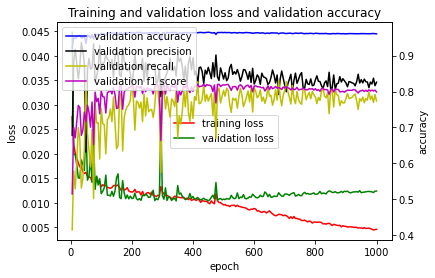

In [3]:
print('statsrec', temp_statsrec)

for i in range(len(temp_statsrec[0])):
    line1 = f'{i}'
    for j in range(6):
        line1 = f'{line1}, {temp_statsrec[j][i]}'
    print(line1)
min_loss = 1
min_index = 0
for i in range(0, len(temp_statsrec[0])):
    if min_loss > temp_statsrec[1][i]:
        min_loss = temp_statsrec[1][i]
        min_index = i

best_epoch = (min_index + 1) * validation_round
print(f'All epoch: {max_run_round}, Best epoch: {best_epoch}, Min loss:{min_loss}, Min index:{min_index} validation round:{validation_round}')

#visulize the accuracy and the training loss and the validation loss
fig, ax1 = plt.subplots()
x_ = [validation_round*(p+1)for p in range(0, len(temp_statsrec[0]))]
plt.plot(x_, temp_statsrec[0], 'r', label = 'training loss', )
plt.plot(x_, temp_statsrec[1], 'g', label = 'validation loss' )
plt.legend(loc='center')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss and validation accuracy')
ax2=ax1.twinx()
ax2.plot(x_, temp_statsrec[2], 'b', label = 'validation accuracy')
ax2.plot(x_, temp_statsrec[3], 'k', label = 'validation precision')
ax2.plot(x_, temp_statsrec[4], 'y', label = 'validation recall')
ax2.plot(x_, temp_statsrec[5], 'm', label = 'validation f1 score')
ax2.set_ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

In [4]:
def load_checkpoint(path):
    from code.model import UNet
    model_checkpoint = torch.load(path)
    #print('model_checkpoint',model_checkpoint)
    #net2 = UNet(3,2)
    #print('model_checkpoint', type(model_checkpoint), model_checkpoint)
    #net_part = model_checkpoint['state_dict']
    #print('net_part',net_part)
    #net2.load_state_dict(net_part)
   # net2.load_state_dict(model_checkpoint['state_dict'])
    
    return model_checkpoint.to(device)
    #optimizer.load_state_dict(model_checkpoint['optimizer'])
    #return model, optimizer

net2 = load_checkpoint(f'models/{best_epoch:05d}.pkl')
set_net(net2, 123)
net = net2

In [5]:
from code.trainer import predict_method, calc_loss


statsrec1 = [[],[],[],[],[],[],[],[]]
if not lp_method:
    all_outputs = []
    net.eval()
    with torch.no_grad():
        for i, data in enumerate(validate_loader, 0):
            inputs_cpu, labels_cpu, _ = data
            inputs, labels = inputs_cpu.to(device), labels_cpu.to(device)
                
            outputs = net(inputs)
            outputs = F.softmax(outputs, 1)
            outputs = outputs.permute(1, 0, 2, 3)
            outputs = outputs[1]
            labels = labels.int()
            all_outputs.append((outputs, labels))

    for i in range(100):
        threshold = 0.01 * i
        positive, negative, false_negative, false_positive = 0, 0, 0, 0
        for outputs, labels in all_outputs:
            #print('sum', outputs.shape, outputs.sum())
            predicted = torch.where(outputs>threshold, 1, 0)
            #_, predicted = torch.max(outputs, 1)
            #labels = images.long()
            predicted = predicted.int()
            zeros = torch.zeros(labels.shape).to(device).int()
            #print('images1', images1)
            not_labels = 1 - labels
            positive       += torch.where(predicted==labels, labels, zeros).sum()
            negative       += torch.where(predicted==labels, not_labels, zeros).sum()
            false_negative += torch.where(predicted!=labels, labels, zeros).sum()
            false_positive += torch.where(predicted!=labels, not_labels, zeros).sum()
            #print(positive_right, negative_right, positive_wrong, negative_wrong)
        #print(threshold, positive_right, negative_right, positive_wrong, negative_wrong)
        statsrec1[0].append(positive)    
        statsrec1[1].append(negative)    
        statsrec1[2].append(false_negative)    
        statsrec1[3].append(false_positive)   
        

In [6]:
from PIL import Image
import matplotlib.pyplot as plt


for p in range(4):
    statsrec1[p] = [q.cpu() for q in statsrec1[p]]
    print(f'statsrec1{p}:')
    temp_str = ''.join([f'({q},{statsrec1[p][q]})' for q in range(len(statsrec1[p]))])
    print(temp_str)

def draw_threshold_pics():
    #print('statsrec', statsrec)
    #visulize the accuracy and the training loss and the validation loss
    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[0], 'r', label = 'positive', )
    plt.plot(statsrec1[1], 'g', label = 'negative' )
    plt.plot(statsrec1[2], 'b', label = 'false negative' )
    plt.plot(statsrec1[3], 'y', label = 'false positive' )
    #print('stat',statsrec)
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    #ax2=ax1.twinx()
    #ax2.plot(statsrec[2], 'b', label = 'validation accuracy')
    #ax2.set_ylabel('accuracy')
    #plt.legend(loc='upper left')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[0], 'r', label = 'positive', )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[1], 'g', label = 'negative' )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[2], 'b', label = 'false negative' )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[3], 'y', label = 'false positive' )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

if not lp_method:
    draw_threshold_pics()

statsrec10:

statsrec11:

statsrec12:

statsrec13:



In [7]:
max_threshold = 0
max_f1 = 0
if not lp_method:
    precisions = []
    recalls = []
    accs = []
    f1s = []
    for p in range(len(statsrec1[0])):
        acc1 = (statsrec1[0][p] + statsrec1[1][p]) / (statsrec1[0][p] + statsrec1[1][p] + statsrec1[2][p] + statsrec1[3][p])
        accs.append(acc1.numpy())
        precision1 = statsrec1[0][p]  / (statsrec1[0][p] + statsrec1[2][p])
        precisions.append(precision1.numpy())
        recall1 = statsrec1[0][p]  / (statsrec1[0][p] + statsrec1[3][p])
        recalls.append(recall1.numpy())
        f1_score = 2*precision1*recall1/(precision1+recall1)
        f1s.append(f1_score.numpy())
        #print('f1_score',f1_score.numpy())
        if max_f1 < f1_score.numpy():
            max_f1 = f1_score.numpy()
            max_threshold = p * 0.01
    print(f'max threshold:{max_threshold}, max f1 score:{max_f1}')

    fig, ax1 = plt.subplots()
    plt.plot(accs, 'r', label = 'accuracy', )
    plt.plot(recalls, 'g', label = 'recall', )
    plt.plot(precisions, 'b', label = 'precision', )
    plt.plot(f1s, 'k', label = 'f1 score', )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('%')
    plt.title('Threshold')
    #ax2=ax1.twinx()
    #ax2.plot(statsrec[2], 'b', label = 'validation accuracy')
    #ax2.set_ylabel('accuracy')
    #plt.legend(loc='upper left')
    plt.show()


In [8]:
##visulaize the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix of valiation set', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Threshold: 0.5, Accuracy: 0.9649813771, Precision: 0.8426284790, Recall: 0.8020830154, F1: 0.8218560219
Confusion matrix, without normalization
tensor([[4259568,   72677],
        [  96022,  389141]], dtype=torch.int32)


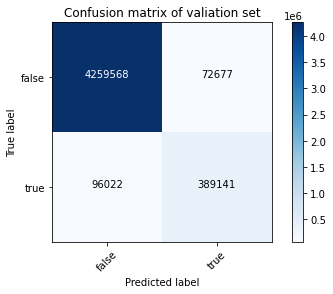

In [9]:
from code.trainer import test_one_batch

ltst, positive, negative, false_negative, false_positive = test_one_batch(validate_loader, False)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)
print(f'Threshold: 0.5, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')

cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

Threshold: 0, Accuracy: 0.1007103845, Precision: 0.1007103845, Recall: 1.0000000000, F1: 0.1829916090
Confusion matrix, without normalization
tensor([[      0, 4332245],
        [      0,  485163]], dtype=torch.int32)


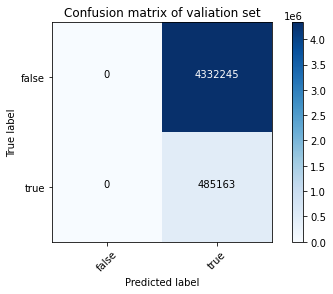

In [10]:
from code.trainer import test_with_threshold

positive, negative, false_negative, false_positive = test_with_threshold(validate_loader, False, max_threshold)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)
print(f'Threshold: {max_threshold}, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')


cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

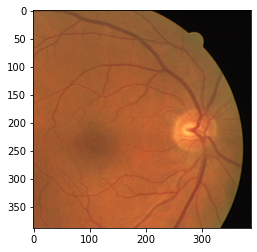

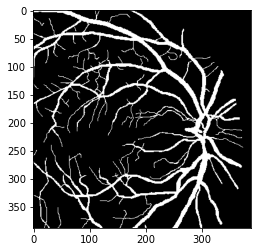

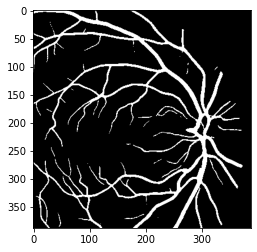

In [11]:
from code.draw_helper import draw_one_area

# draw one sample patch
data_image, label_image, predicted_image = draw_one_area(dataset_test, 0, max_threshold)

plt.imshow(data_image)
plt.show()

plt.imshow(label_image)
plt.show()

plt.imshow(predicted_image)
plt.show()

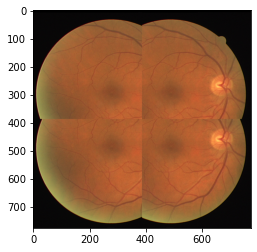

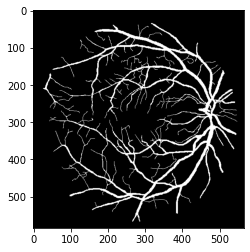

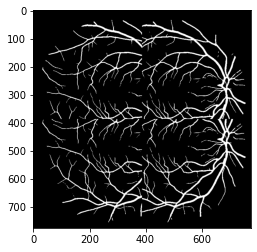

In [12]:
from code.draw_helper import draw_patches


data_image, label_image, predicted_image = draw_patches(dataset_test, 0, max_threshold)

plt.imshow(data_image)
plt.show()

plt.imshow(label_image)
plt.show()

plt.imshow(predicted_image)
plt.show()

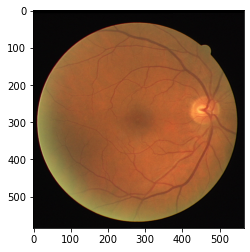

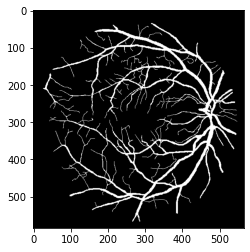

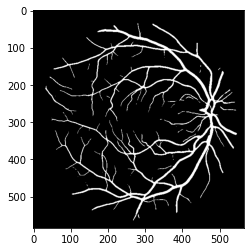

In [13]:
from code.draw_helper import draw_full


data_image, label_image, predicted_image = draw_full(dataset_test, 0, max_threshold)

plt.imshow(data_image)
plt.show()

plt.imshow(label_image)
plt.show()

plt.imshow(predicted_image)
plt.show()

len 8 6 4


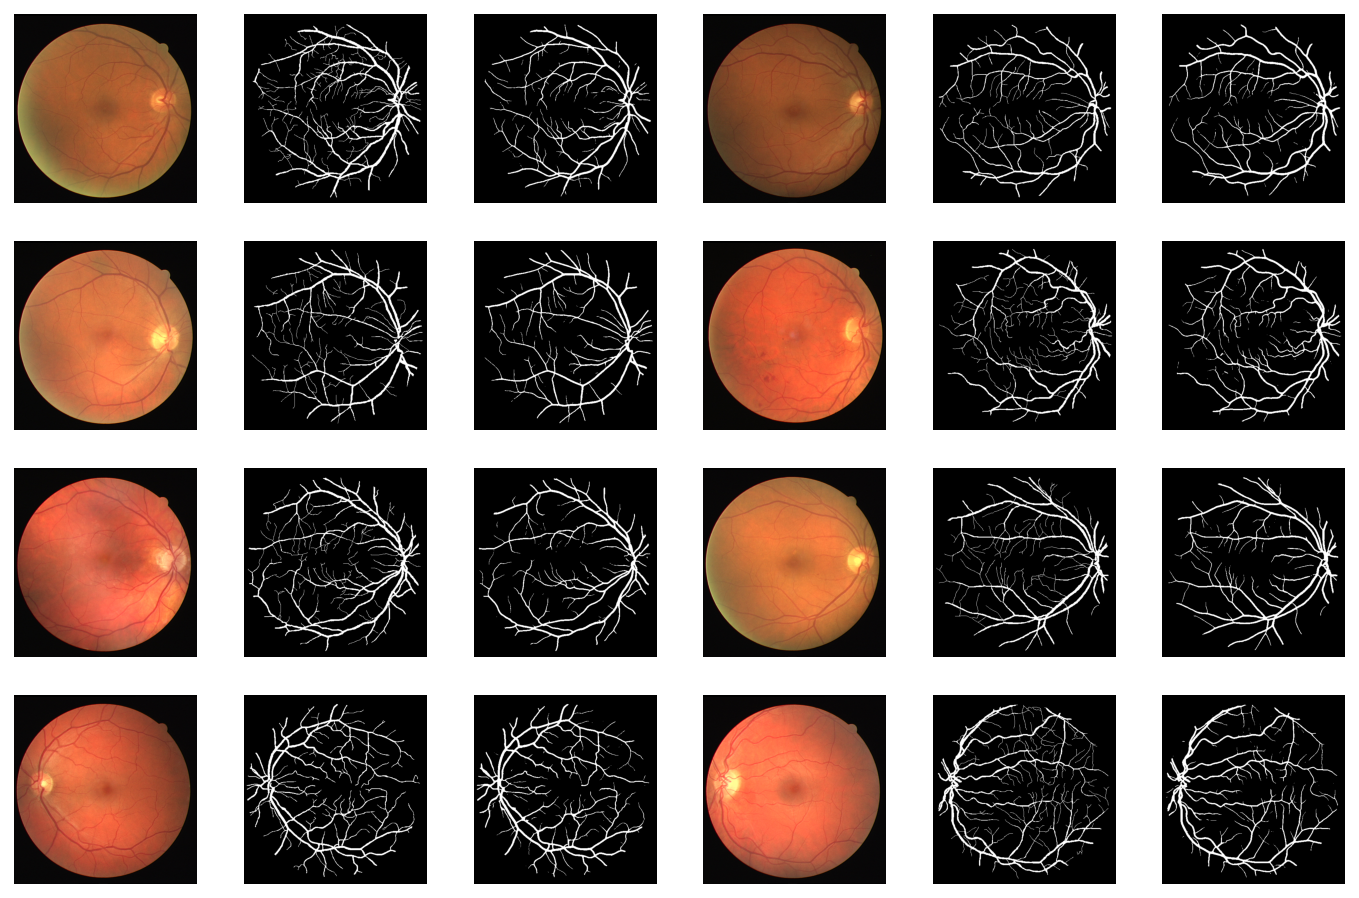

In [14]:
import matplotlib.pylab as plt
from code.draw_helper import draw_full
%matplotlib inline
%config InlineBackend.figure_formats = set(['retina'])

test_len = dataset_test.length()
index = 1
colomn_number = 2
line_number = (test_len - 1)//colomn_number + 1
colomn_number = colomn_number * 3

print('len', test_len, colomn_number, line_number)
plt.figure(3, figsize=(12,8))
for i in range(test_len):
    data_image, label_image, predicted_image = draw_full(dataset_test, i, max_threshold)
    for q in [data_image, label_image, predicted_image]:
        #plt.subplot(line_number, colomn_number, index)
        plt.subplot(4, 6, index)
        index = index + 1
        plt.imshow(q)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
plt.show()

Confusion matrix, without normalization
tensor([[4281895,   81813],
        [  89391,  364309]], dtype=torch.int32)
Threshold: 0.5, Accuracy: 0.9644613862, Precision: 0.8166129589, Recall: 0.8029733300, F1: 0.8097357750
+  1,   84240/  250958=0.33567369838777805
+  2,    4722/  121824=0.038760835303388495
+  3,     326/   56592=0.005760531523890303
+  4,      53/   18721=0.0028310453501415524
+  5,      41/    4427=0.009261350801897448
+  6,       6/     941=0.006376195536663124
+  7,       2/     187=0.0106951871657754
+  8,       1/      34=0.029411764705882353
+  9,       0/      12=0.0
+ 10,       0/       4=0.0
-  1,   71849/  295609=0.24305416952799136
-  2,    6872/  279591=0.02457875968825892
-  3,     617/  265928=0.0023201768899852593
-  4,     321/  252673=0.0012704167045944758
-  5,     274/  238617=0.0011482836512067456
-  6,     264/  224750=0.001174638487208009
-  7,     226/  210835=0.001071928285151896
-  8,     204/  196183=0.0010398454504212903
-  9,     163/  180338

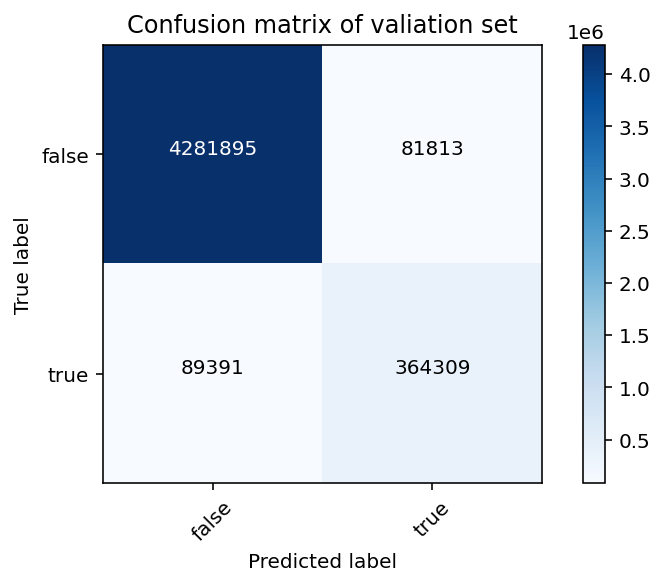

In [15]:
from code.trainer import test_one_batch

ltst, positive, negative, false_negative, false_positive, was, als = test_one_batch(test_loader, True)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)

cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

print(f'Threshold: 0.5, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')
#print('was', was, als)
for p in range(200):
    if als[1000+p] != 0:
        print(f'+{p:3d},{was[1000+p]:8d}/{als[1000+p]:8d}={was[1000+p]/als[1000+p]}')

for p in range(200):
    if als[1000-p] != 0:
        print(f'-{p:3d},{was[1000-p]:8d}/{als[1000-p]:8d}={was[1000-p]/als[1000-p]}')

Confusion matrix, without normalization
tensor([[      0, 4363708],
        [      0,  453700]], dtype=torch.int32)
Threshold: 0, Accuracy: 0.0941792801, Precision: 0.0941792801, Recall: 1.0000000000, F1: 0.1721459776
+  1,       0/  250958=0.0
+  2,       0/  121824=0.0
+  3,       0/   56592=0.0
+  4,       0/   18721=0.0
+  5,       0/    4427=0.0
+  6,       0/     941=0.0
+  7,       0/     187=0.0
+  8,       0/      34=0.0
+  9,       0/      12=0.0
+ 10,       0/       4=0.0
-  1,  295609/  295609=1.0
-  2,  279591/  279591=1.0
-  3,  265928/  265928=1.0
-  4,  252673/  252673=1.0
-  5,  238617/  238617=1.0
-  6,  224750/  224750=1.0
-  7,  210835/  210835=1.0
-  8,  196183/  196183=1.0
-  9,  180338/  180338=1.0
- 10,  164030/  164030=1.0
- 11,  148356/  148356=1.0
- 12,  133706/  133706=1.0
- 13,  120247/  120247=1.0
- 14,  108073/  108073=1.0
- 15,   96409/   96409=1.0
- 16,   86178/   86178=1.0
- 17,   77162/   77162=1.0
- 18,   69130/   69130=1.0
- 19,   61882/   61882=1.0

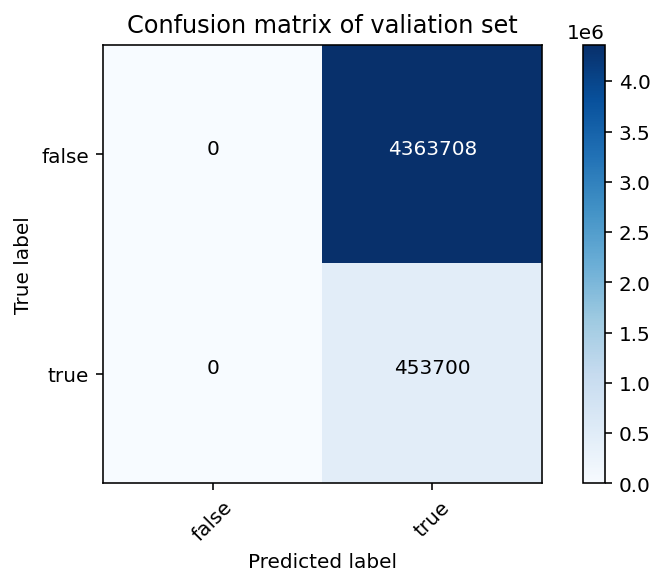

In [16]:
from code.trainer import test_one_batch

positive, negative, false_negative, false_positive, was, als = test_with_threshold(test_loader, True, max_threshold)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)

cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

print(f'Threshold: {max_threshold}, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')
#print('was', was, als)
for p in range(200):
    if als[1000+p] != 0:
        print(f'+{p:3d},{was[1000+p]:8d}/{als[1000+p]:8d}={was[1000+p]/als[1000+p]}')

for p in range(200):
    if als[1000-p] != 0:
        print(f'-{p:3d},{was[1000-p]:8d}/{als[1000-p]:8d}={was[1000-p]/als[1000-p]}')